In [ ]:
!pip install vaderSentiment
!pip install ipysheet
!pip install scikit-learn
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re

# Load CSV data from TwExport

heroes_df = pd.read_csv('/content/All_Heroesss.csv')
heroines_df = pd.read_csv('/content/All_Heroinsss.csv')

# Preprocessing function with emoji removal
def clean_tweet(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove mentions (@username)
        text = re.sub(r'@\w+', '', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        # Remove numbers and special characters
        text = re.sub(r'\d+', '', text)
        # Remove emojis using a regex pattern
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               u"\U0001F780-\U0001F7FF"
                               u"\U0001F800-\U0001F8FF"
                               u"\U0001F900-\U0001F9FF"
                               u"\U0001FA00-\U0001FA6F"
                               u"\U0001FA70-\U0001FAFF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        return text
    else:
        return ''

# Function to remove special characters
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^A-Za-z0-9\s]+', '', text)
    return text

# Apply the cleaning function to each column individually
heroes_df = heroes_df.apply(lambda col: col.apply(clean_text))
heroines_df= heroines_df.apply(lambda col: col.apply(clean_text))

# Save the cleaned datasets
heroes_df.to_csv('/content/All_Heroesss_cleaned.csv', index=False)
heroines_df.to_csv('/content/All_Heroinsss_cleaned.csv', index=False)

heroes_df['cleaned_text'] = heroes_df['TweetText'].apply(clean_tweet)
heroes_df['cleaned_text'].fillna('', inplace=True)
heroes_df.head()

heroines_df['cleaned_text'] = heroines_df['TweetText'].apply(clean_tweet)
heroines_df['cleaned_text'].fillna('', inplace=True)
heroines_df.head()

<ipython-input-2-ce2883f7a96f>:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heroes_df['cleaned_text'].fillna('', inplace=True)
<ipython-input-2-ce2883f7a96f>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,ID,Name,Handle,TweetText,TweetCreateTime,cleaned_text
0,1.280000e+18,Anushka Sharma,AnushkaSharma,The cool breeze the steady waves some sand o...,10072020 1135,The cool breeze the steady waves some sand o...
1,1.280000e+18,Abdullah,abza4x,AnushkaSharma VOGUEIndia Uffffff,11072020 0715,AnushkaSharma VOGUEIndia Uffffff
2,1.280000e+18,GURU WHALE,GuruWhale0,AnushkaSharma VOGUEIndia yeh kya pahnahe hum m...,10072020 1201,AnushkaSharma VOGUEIndia yeh kya pahnahe hum m...
3,1.280000e+18,Pramod Kumar,PramodK78264248,AnushkaSharma VOGUEIndia Easy for shopping tim...,10072020 1517,AnushkaSharma VOGUEIndia Easy for shopping tim...
4,1.280000e+18,,inirmalsp,AnushkaSharma VOGUEIndia My Bhabhi u beauty,10072020 1452,AnushkaSharma VOGUEIndia My Bhabhi u beauty


VADER_Sentiment
neutral     7079
positive    4357
negative    1047
Name: count, dtype: int64


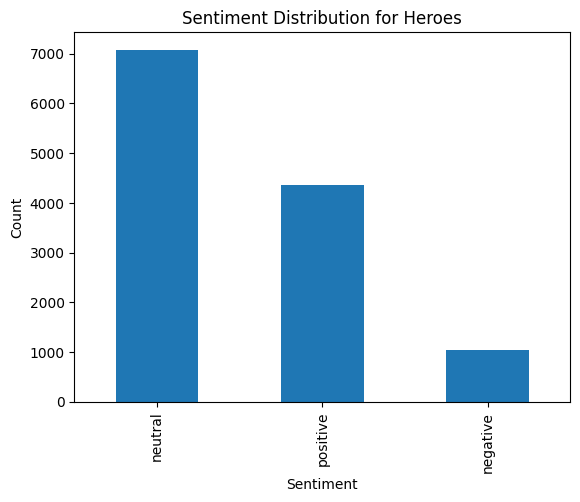

VADER_Sentiment
neutral     6388
positive    5230
negative     828
Name: count, dtype: int64


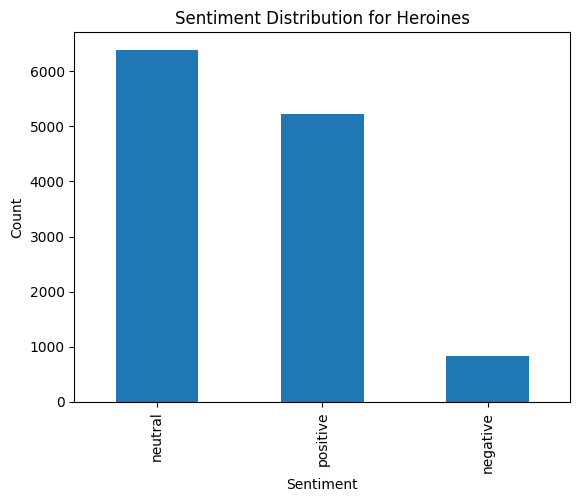

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the cleaned datasets
heroes_df = pd.read_csv('/content/All_Heroesss_sentiment.csv')
heroines_df = pd.read_csv('/content/All_Heroinsss_sentiment.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(tweet):
    # Check if the tweet is a string before analyzing
    if isinstance(tweet, str):
        score = analyzer.polarity_scores(tweet)
        if score['compound'] >= 0.05:
            return 'positive'
        elif score['compound'] <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    else:
        # Return 'neutral' for non-string values
        return 'neutral'

# Apply the classify_sentiment function to each tweet in both datasets
heroes_df['VADER_Sentiment'] = heroes_df['TweetText'].apply(classify_sentiment)
heroines_df['VADER_Sentiment'] = heroines_df['TweetText'].apply(classify_sentiment)


# Evaluate the sentiment distribution for heroes
sentiment_counts_heroes = heroes_df['VADER_Sentiment'].value_counts()
print(sentiment_counts_heroes)

# Plot sentiment distribution for heroes
sentiment_counts_heroes.plot(kind='bar', title='Sentiment Distribution for Heroes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Repeat for heroines
sentiment_counts_heroines = heroines_df['VADER_Sentiment'].value_counts()
print(sentiment_counts_heroines)

# Plot sentiment distribution for heroines
sentiment_counts_heroines.plot(kind='bar', title='Sentiment Distribution for Heroines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Logistic Regression Accuracy: 0.9142
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.45      0.59       374
     neutral       0.90      0.99      0.94      2669
    positive       0.95      0.90      0.93      1943

    accuracy                           0.91      4986
   macro avg       0.90      0.78      0.82      4986
weighted avg       0.91      0.91      0.91      4986



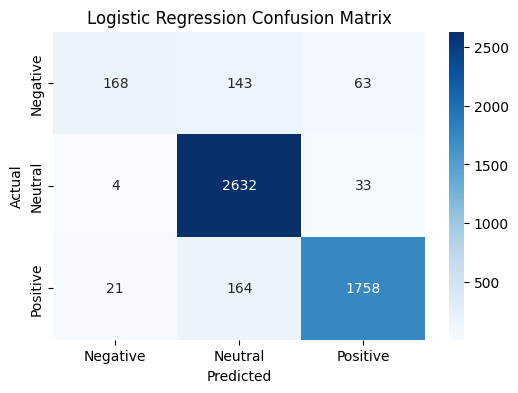

Naive Bayes Accuracy: 0.8442
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.10      0.17       374
     neutral       0.87      0.91      0.89      2669
    positive       0.81      0.90      0.85      1943

    accuracy                           0.84      4986
   macro avg       0.87      0.64      0.64      4986
weighted avg       0.85      0.84      0.82      4986



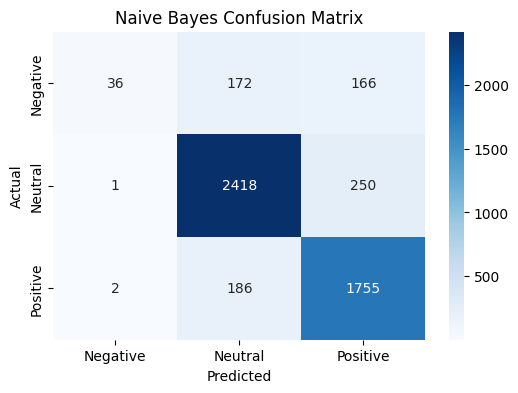

Support Vector Machine Accuracy: 0.9382
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.63      0.73       374
     neutral       0.93      0.99      0.96      2669
    positive       0.96      0.93      0.94      1943

    accuracy                           0.94      4986
   macro avg       0.92      0.85      0.88      4986
weighted avg       0.94      0.94      0.94      4986



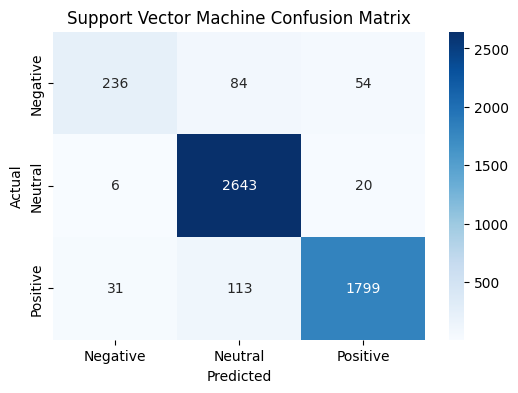

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned datasets with sentiment
heroes_df = pd.read_csv('/content/Heroess_Vader_sentiment.csv')
heroines_df = pd.read_csv('/content/Heroinss_Vader_sentiment.csv')

# Combine the datasets
combined_df = pd.concat([heroes_df, heroines_df], ignore_index=True)
X = combined_df['TweetText']  # Assuming 'TweetText' is the column with tweet text
y = combined_df['VADER_Sentiment'] # Assuming 'VADER_Sentiment' is the column with sentiment labels

X = X.fillna('')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear', probability=True)  # Using linear kernel
}

# Train and evaluate each model
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)

Heroes Stereotype Summary: {'masculine_count': 255, 'feminine_count': 211, 'total_tweets': 12483}
Heroines Stereotype Summary: {'masculine_count': 164, 'feminine_count': 552, 'total_tweets': 12446}


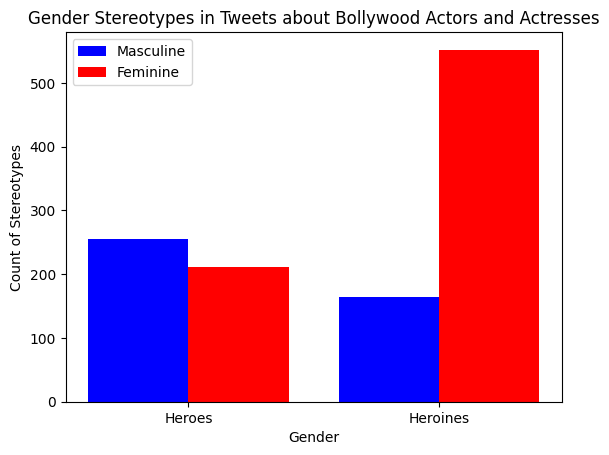

In [ ]:
  # Define lists of words associated with gender stereotypes
masculine_stereotypes = [
    'strong', 'brave', 'assertive', 'leader', 'dominant', 'stoic', 'competitive',
    'handsome', 'manly', 'tough', 'powerful', 'independent', 'fearless', 'confident',
    'aggressive', 'macho', 'hardworking', 'ambitious', 'adventurous', 'intelligent',
    'rugged', 'resilient', 'heroic', 'tough-minded', 'protective', 'competitive',
    'brave', 'tough', 'assertive', 'determined', 'self-reliant', 'disciplined', 'proud',
    'rational', 'unemotional', 'decisive', 'dominant', 'uncompromising', 'adrenaline-driven',
    'outspoken', 'stoical', 'tactical', 'focused', 'unwavering', 'logical', 'strategic',
    'ambitious', 'resolute', 'self-assured', 'athletic', 'daring', 'adrenaline junkie',
    'hardcore', 'unshakable', 'authoritative', 'in control', 'rugged', 'outdoor enthusiast',
    'assertive', 'innovative', 'visionary', 'stoic', 'motivated', 'practical', 'diligent',
    'dominant', 'risk-taking', 'rugged', 'action-oriented', 'driven', 'unrelenting', 'tough-minded',
    'self-confident', 'decisive', 'strategic', 'goal-oriented', 'commanding', 'competitive spirit',
    'hard-hitting', 'resilient', 'logical', 'adventurous', 'mechanical', 'engineer', 'hands-on', 'pioneering'
]

feminine_stereotypes = [
    'caring', 'nurturing', 'emotional', 'gentle', 'submissive', 'delicate', 'beautiful',
    'graceful', 'supportive', 'soft', 'sensitive', 'compassionate', 'modest', 'affectionate',
    'tender', 'family-oriented', 'quiet', 'cooperative', 'charming', 'empathetic', 'sweet',
    'loving', 'motherly', 'submissive', 'gentle', 'caring', 'warm', 'gracious', 'affectionate',
    'compassionate', 'tender-hearted', 'understanding', 'nurturing', 'elegant', 'passive',
    'peaceful', 'cozy', 'wholesome', 'subtle', 'dependable', 'soft-spoken', 'receptive', 'caring',
    'supportive', 'patient', 'modest', 'empathic', 'considerate', 'innocent', 'understated',
    'selfless', 'heartfelt', 'sympathetic', 'gentle-hearted', 'tenderhearted', 'sweet-tempered',
    'loyal', 'faithful', 'serene', 'kind-hearted', 'homely', 'understanding', 'devoted', 'unassuming',
    'affectionate', 'non-assertive', 'helpful', 'quiet', 'family-oriented', 'nurturing', 'refined',
    'caring', 'thoughtful', 'sociable', 'demure', 'devoted', 'maternal', 'compassionate', 'gracious',
    'companionate', 'affable', 'romantic', 'delicate', 'trustworthy', 'tender-hearted', 'sensitive',
    'gentle-natured', 'grateful', 'sweet-natured', 'eager to please', 'modest', 'loyal-hearted',
    'patient', 'peaceful', 'non-judgmental', 'tactful', 'altruistic', 'graceful', 'conscientious'
]


  # Function to analyze gender stereotypes in tweets
  def analyze_gender_stereotypes(df):
      # Convert the 'TweetText' column to string type to ensure 'lower()' can be applied
      df['TweetText'] = df['TweetText'].astype(str)

      df['masculine_count'] = df['TweetText'].apply(lambda text: sum(word in text.lower() for word in masculine_stereotypes))
      df['feminine_count'] = df['TweetText'].apply(lambda text: sum(word in text.lower() for word in feminine_stereotypes))

      # Summarize the counts
      summary = {
          'masculine_count': df['masculine_count'].sum(),
          'feminine_count': df['feminine_count'].sum(),
          'total_tweets': len(df)
      }

      return summary

  # Analyze stereotypes for heroes
  heroes_stereotype_summary = analyze_gender_stereotypes(heroes_df)
  print("Heroes Stereotype Summary:", heroes_stereotype_summary)

  # Analyze stereotypes for heroines
  heroines_stereotype_summary = analyze_gender_stereotypes(heroines_df)
  print("Heroines Stereotype Summary:", heroines_stereotype_summary)

  import matplotlib.pyplot as plt

  # Prepare data for visualization
  labels = ['Heroes', 'Heroines']
  masculine_counts = [heroes_stereotype_summary['masculine_count'], heroines_stereotype_summary['masculine_count']]
  feminine_counts = [heroes_stereotype_summary['feminine_count'], heroines_stereotype_summary['feminine_count']]

  x = range(len(labels))

  # Plotting
  plt.bar(x, masculine_counts, width=0.4, label='Masculine', color='blue', align='center')
  plt.bar([p + 0.4 for p in x], feminine_counts, width=0.4, label='Feminine', color='red', align='center')

  plt.xlabel('Gender')
  plt.ylabel('Count of Stereotypes')
  plt.title('Gender Stereotypes in Tweets about Bollywood Actors and Actresses')
  plt.xticks([p + 0.2 for p in x], labels)
  plt.legend()
  plt.show()

Top 5 Masculine Stereotype Keywords:
handsome: 112
proud: 52
leader: 11
strong: 10
focused: 3

Top 5 Feminine Stereotype Keywords:
beautiful: 93
sweet: 14
romantic: 8
charming: 7
innocent: 7

Top 5 Masculine Stereotype Keywords (Heroines):
proud: 85
strong: 14
powerful: 6
handsome: 6
rational: 5

Top 5 Feminine Stereotype Keywords (Heroines):
beautiful: 390
sweet: 58
innocent: 13
elegant: 8
loving: 7


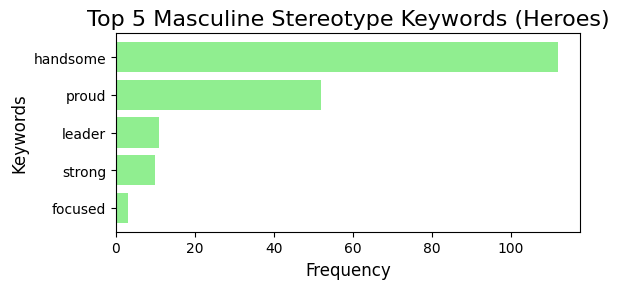

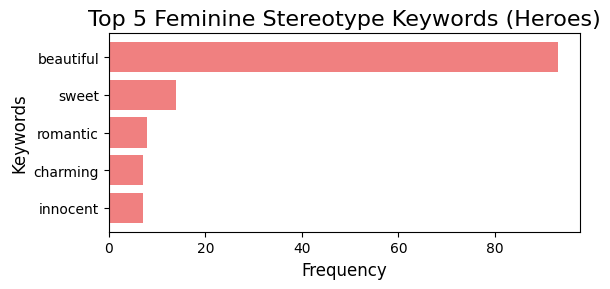

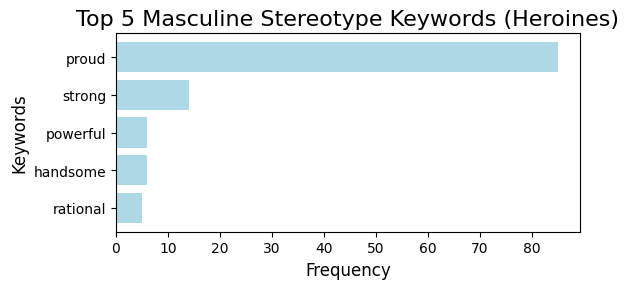

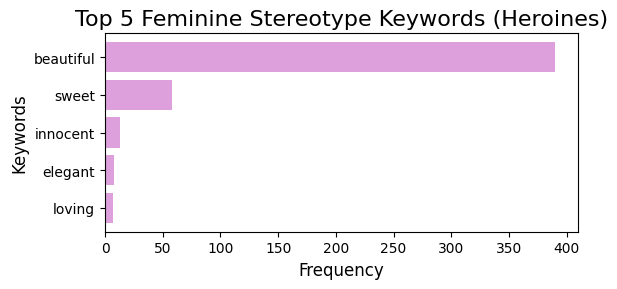

In [ ]:
from collections import Counter

# Function to find top 5 stereotype words with counts
def top_keywords(df, stereotype_list):
    # Convert the 'TweetText' column to string type to ensure 'lower()' can be applied
    df['TweetText'] = df['TweetText'].astype(str)

    # Flatten the list of all words that match the stereotype words
    all_stereotype_words = [
        word for text in df['TweetText'] for word in text.lower().split() if word in stereotype_list
    ]

    # Count the frequency of each word
    word_counts = Counter(all_stereotype_words)

    # Get the top 10 most common words
    top_5_keywords = word_counts.most_common(5)

    return top_5_keywords

# Get the top 10 masculine stereotype words
top_masculine_keywords = top_keywords(heroes_df, masculine_stereotypes)
print("Top 5 Masculine Stereotype Keywords:")
for word, count in top_masculine_keywords:
    print(f"{word}: {count}")

# Get the top 10 feminine stereotype words
top_feminine_keywords = top_keywords(heroes_df, feminine_stereotypes)
print("\nTop 5 Feminine Stereotype Keywords:")
for word, count in top_feminine_keywords:
    print(f"{word}: {count}")

# You can do the same for heroines_df if needed
top_masculine_keywords_heroines = top_keywords(heroines_df, masculine_stereotypes)
top_feminine_keywords_heroines = top_keywords(heroines_df, feminine_stereotypes)

# Displaying for heroines as well
print("\nTop 5 Masculine Stereotype Keywords (Heroines):")
for word, count in top_masculine_keywords_heroines:
    print(f"{word}: {count}")

print("\nTop 5 Feminine Stereotype Keywords (Heroines):")
for word, count in top_feminine_keywords_heroines:
    print(f"{word}: {count}")


import matplotlib.pyplot as plt
from collections import Counter

# Function to find top 5 stereotype words with counts
def top_keywords(df, stereotype_list):
    # Convert the 'TweetText' column to string type to ensure 'lower()' can be applied
    df['TweetText'] = df['TweetText'].astype(str)

    # Flatten the list of all words that match the stereotype words
    all_stereotype_words = [
        word for text in df['TweetText'] for word in text.lower().split() if word in stereotype_list
    ]

    # Count the frequency of each word
    word_counts = Counter(all_stereotype_words)

    # Get the top 5 most common words
    top_5_keywords = word_counts.most_common(5)

    return top_5_keywords

# Function to plot the top 5 keywords as a bar chart
def plot_keywords(keywords, title, color='skyblue'):
    words, counts = zip(*keywords)

    plt.figure(figsize=(6, 3))
    plt.barh(words, counts, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Keywords', fontsize=12)
    plt.gca().invert_yaxis()  # To have the most frequent word on top
    plt.tight_layout()
    plt.show()

# Get the top 5 masculine stereotype words
top_masculine_keywords = top_keywords(heroes_df, masculine_stereotypes)
plot_keywords(top_masculine_keywords, "Top 5 Masculine Stereotype Keywords (Heroes)", color='lightgreen')

# Get the top 5 feminine stereotype words
top_feminine_keywords = top_keywords(heroes_df, feminine_stereotypes)
plot_keywords(top_feminine_keywords, "Top 5 Feminine Stereotype Keywords (Heroes)", color='lightcoral')

# Get the top 5 masculine stereotype words for heroines
top_masculine_keywords_heroines = top_keywords(heroines_df, masculine_stereotypes)
plot_keywords(top_masculine_keywords_heroines, "Top 5 Masculine Stereotype Keywords (Heroines)", color='lightblue')

# Get the top 5 feminine stereotype words for heroines
top_feminine_keywords_heroines = top_keywords(heroines_df, feminine_stereotypes)
plot_keywords(top_feminine_keywords_heroines, "Top 5 Feminine Stereotype Keywords (Heroines)", color='plum')


Heroes Stereotype Summary:
              Name  positive_masculine_count  negative_masculine_count  \
0    Akshay Kumar                       607                        12   
1  Hrithik Roshan                       481                         4   
2   Ranveer Singh                       401                         0   
3             SRK                       464                         6   
4     Salman Khan                       485                         5   

   positive_feminine_count  negative_feminine_count  
0                       49                      186  
1                       41                      126  
2                       29                      118  
3                       31                      110  
4                       30                      106  
Heroines Stereotype Summary:
                Name  positive_masculine_count  negative_masculine_count  \
0        Alia Bhatt                        38                         3   
1    Anushka Sharma          

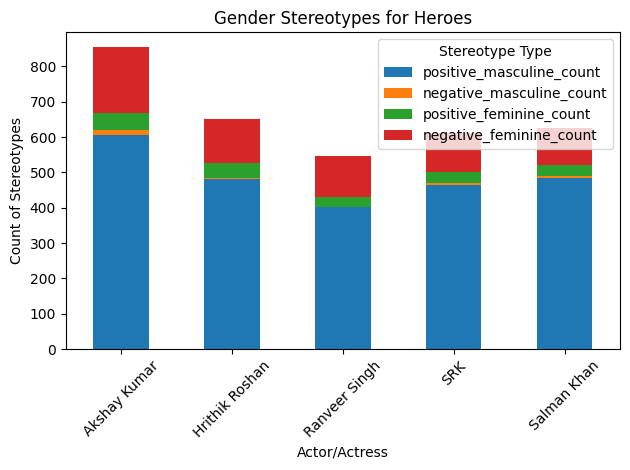

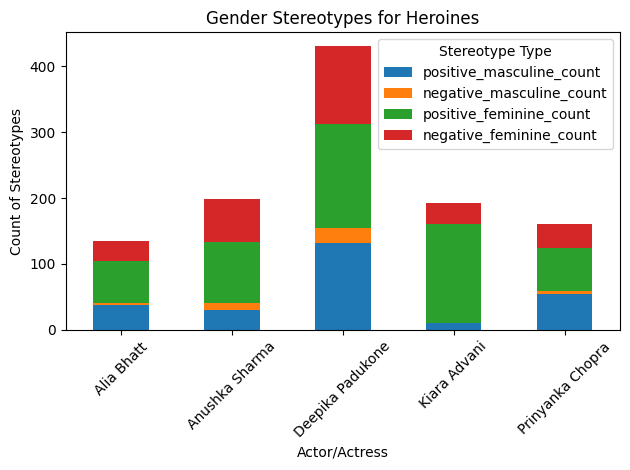

In [ ]:
import matplotlib.pyplot as plt

negative_feminine_stereotypes =[]
negative_masculine_stereotypes=[]

positive_masculine_stereotypes = [
    'strong', 'confident', 'handsome', 'leader', 'assertive', 'adventurous', 'brave', 'funny',
    'smart', 'resourceful', 'independent', 'ambitious', 'loyal', 'disciplined', 'protective',
    'courageous', 'innovative', 'competitive', 'successful', 'dynamic',
    'majboot', 'aatmavishwas', 'sundar', 'neta', 'spasht', 'sahasik', 'veer', 'mazedaar',
    'chatur', 'sampann', 'swatantra', 'utsahi', 'vafadar', 'anushasit', 'rakshak', 'navachar',
    'pratispardha', 'safal', 'gatisheel', 'motivated', 'brilliant', 'fearless', 'diligent',
    'bold', 'visionary', 'determined', 'resilient', 'unwavering', 'empowered', 'tough', 'tactical',
    'dominant', 'fierce', 'entrepreneurial', 'strategic', 'energetic', 'resilient', 'proud'
]

negative_masculine_stereotypes += [
    'egotistical', 'disrespectful', 'conceited', 'arrogant', 'aggressive', 'selfish', 'unforgiving',
    'insensitive', 'reckless', 'overbearing', 'haughty', 'rude', 'manipulative', 'overindulgent',
    'tyrannical', 'impulsive', 'unrepentant', 'disdainful', 'violent-tempered', 'self-important',
    'hostile', 'uncompromising', 'predatory', 'cold', 'despondent', 'irresponsible', 'unemotional',
    'uncaring', 'obsessive', 'controlling', 'vindictive', 'egocentric', 'exploitative', 'domineering',
    'alienating', 'dismissive', 'chauvinist', 'self-serving', 'greedy', 'hardened', 'apathetic',
    'inconsiderate', 'unfeeling', 'unreliable', 'shameless', 'sociopathic', 'unapproachable',
    'dictatorial', 'overzealous', 'callous', 'predatory', 'unconcerned', 'insensitive', 'self-righteous',
    'condescending', 'intolerable', 'paranoid', 'untrustworthy', 'vindictive', 'tyrannical',
    'bullying', 'domineering', 'unforgiving', 'self-destructive', 'irrational', 'pompous', 'patriarchal',
    'overconfident', 'misogynistic', 'controlling', 'arrogant', 'uncompromising', 'unapproachable',
    'egocentric', 'cynical', 'threatening', 'stubborn', 'impulsive', 'dishonorable', 'hypercompetitive',
    'non-empathetic', 'unstable', 'unwilling to compromise', 'boastful', 'intolerant', 'self-absorbed',
    'unrepentant', 'manupulative', 'toxic', 'dominating', 'chauvinistic', 'patriarchal', 'overbearing',
    'aggrandizing', 'patronizing', 'chauvinist', 'brutal', 'misogynist', 'perfectionist', 'overconfident',
    'rebellious'
]

positive_feminine_stereotypes = [
    'nurturing', 'caring', 'beautiful', 'supportive', 'graceful', 'loving', 'kind', 'gentle',
    'empathetic', 'patient', 'compassionate', 'collaborative', 'resilient', 'charming',
    'insightful', 'warm', 'intuitive', 'selfless', 'creative', 'sophisticated',
    'poshak', 'kareeb', 'sundar', 'sahara dene wali', 'sundarta', 'prem bhari', 'dayalu',
    'narm', 'sahanubhuti', 'sahanushakti', 'dayalu', 'sahaayak', 'sahan karne waali',
    'akarshak', 'sajag', 'garam', 'antarvishkar', 'nishkama', 'srijanatmak', 'sophisticated',
    'affectionate', 'gentle-hearted', 'motherly', 'sympathetic', 'humble', 'understanding',
    'faithful', 'graceful', 'affable', 'serene', 'companionate', 'sociable', 'gentle-natured',
    'tender-hearted', 'loyal-hearted', 'empathetic', 'devoted', 'sensitive', 'thoughtful',
    'patient', 'unpretentious', 'wholesome', 'modest', 'pure-hearted', 'noble', 'supportive'
]

negative_feminine_stereotypes += [
    'jealous', 'vain', 'insecure', 'gossipy', 'overly dependent', 'melodramatic',
    'superficial', 'clingy', 'controlling', 'overly emotional', 'nagging', 'hysterical',
    'manipulative', 'sly', 'shallow', 'petty', 'indecisive', 'obsessive', 'helpless',
    'overly sensitive', 'submissive', 'fragile', 'weak', 'inconsistent', 'demanding', 'bc', 'mc',
    'vindictive', 'hypercritical', 'catty', 'two-faced', 'inconstant', 'overly cautious',
    'conspiratorial', 'dependent', 'attention-seeking', 'insecure', 'fake', 'jealousy',
    'materialistic', 'pampered', 'chatty', 'stubborn', 'overbearing', 'flimsy', 'ditzy',
    'easily distracted', 'vainglorious', 'ego-centric', 'judgmental', 'self-absorbed',
    'ahankar', 'jalebi', 'parachari', 'jealous', 'batameez', 'adhik bhavnaatmak',
    'aasha janak', 'dikhavati', 'abhipray janak', 'sahaj', 'maamuli', 'naari', 'sukh',
    'manchala', 'chipakna', 'kamzor', 'dayalu', 'dar', 'fickle', 'needy', 'overindulgent',
    'petulant', 'manipulative', 'pessimistic', 'delicate', 'attention-seeking', 'high-maintenance',
    'overly protective', 'passive', 'nervous', 'smothering', 'inflexible', 'moody', 'over-sentimental',
    'pretentious', 'ungrateful', 'whiny', 'contradictory', 'scattered', 'neurotic', 'awkward',
    'manipulative', 'nervy', 'self-conscious', 'helpless', 'dramatic', 'conflicted', 'irritable',
    'overexaggerated', 'paranoid', 'clueless', 'manic', 'gullible', 'chaotic', 'hyper', 'frenzied',
    'defensive', 'over-sensitive', 'desperate', 'hyperactive', 'temperamental', 'emotionally fragile',
    'complicated', 'confused', 'clingy', 'moody', 'submissive', 'overanxious', 'addictive', 'unsteady'
]



# Function to analyze positive and negative stereotypes
def analyze_gender_stereotypes(df, name_column):
    # Convert 'TweetText' column to string type, handling potential NaN values
    df['TweetText'] = df['TweetText'].astype(str)
    df['positive_masculine_count'] = df['TweetText'].apply(lambda text: sum(word in text.lower() for word in positive_masculine_stereotypes))
    df['negative_masculine_count'] = df['TweetText'].apply(lambda text: sum(word in text.lower() for word in negative_masculine_stereotypes))
    df['positive_feminine_count'] = df['TweetText'].apply(lambda text: sum(word in text.lower() for word in positive_feminine_stereotypes))
    df['negative_feminine_count'] = df['TweetText'].apply(lambda text: sum(word in text.lower() for word in negative_feminine_stereotypes))

    # Group by actor/actress name and summarize the counts
    summary = df.groupby(name_column).agg({
        'positive_masculine_count': 'sum',
        'negative_masculine_count': 'sum',
        'positive_feminine_count': 'sum',
        'negative_feminine_count': 'sum'
    }).reset_index()

    return summary
# Analyze stereotypes for heroes
heroes_stereotype_summary = analyze_gender_stereotypes(heroes_df, 'Name')
print("Heroes Stereotype Summary:\n", heroes_stereotype_summary)

# Analyze stereotypes for heroines
heroines_stereotype_summary = analyze_gender_stereotypes(heroines_df, 'Name')
print("Heroines Stereotype Summary:\n", heroines_stereotype_summary)

# Visualization function
def plot_stereotype_summary(summary, title):
    summary.set_index('Name', inplace=True)
    summary[['positive_masculine_count', 'negative_masculine_count',
             'positive_feminine_count', 'negative_feminine_count']].plot(kind='bar', stacked=True)

    plt.title(title)
    plt.xlabel('Actor/Actress')
    plt.ylabel('Count of Stereotypes')
    plt.xticks(rotation=45)
    plt.legend(title='Stereotype Type')
    plt.tight_layout()
    plt.show()

# Plot stereotypes for heroes
plot_stereotype_summary(heroes_stereotype_summary, 'Gender Stereotypes for Heroes')

# Plot stereotypes for heroines
plot_stereotype_summary(heroines_stereotype_summary, 'Gender Stereotypes for Heroines')


In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')

# Function to extract top N keywords from a list of words
def extract_top_keywords(df, stereotype_list, n=5):
    # Flatten the text into a list of words from the 'TweetText' column
    all_words = [word for text in df['TweetText'] for word in nltk.word_tokenize(text.lower()) if word in stereotype_list]

    # Count the frequency of each word
    word_freq = Counter(all_words)

    # Get the top N most common words
    top_keywords = word_freq.most_common(n)

    return top_keywords

# Top 10 keywords for positive masculine stereotypes in heroes
heroes_positive_masculine_keywords = extract_top_keywords(heroes_df, positive_masculine_stereotypes)
print("Top 5 Positive Masculine Keywords for Heroes:", heroes_positive_masculine_keywords)

# Top 10 keywords for negative masculine stereotypes in heroes
heroes_negative_masculine_keywords = extract_top_keywords(heroes_df, negative_masculine_stereotypes)
print("Top 5 Negative Masculine Keywords for Heroes:", heroes_negative_masculine_keywords)

# Top 10 keywords for positive feminine stereotypes in heroes
heroes_positive_feminine_keywords = extract_top_keywords(heroes_df, positive_feminine_stereotypes)
print("Top 5 Positive Feminine Keywords for Heroes:", heroes_positive_feminine_keywords)

# Top 10 keywords for negative feminine stereotypes in heroes
heroes_negative_feminine_keywords = extract_top_keywords(heroes_df, negative_feminine_stereotypes)
print("Top 5 Negative Feminine Keywords for Heroes:", heroes_negative_feminine_keywords)

# Top 10 keywords for positive masculine stereotypes in heroines
heroines_positive_masculine_keywords = extract_top_keywords(heroines_df, positive_masculine_stereotypes)
print("Top 5 Positive Masculine Keywords for Heroines:", heroines_positive_masculine_keywords)

# Top 10 keywords for negative masculine stereotypes in heroines
heroines_negative_masculine_keywords = extract_top_keywords(heroines_df, negative_masculine_stereotypes)
print("Top 5 Negative Masculine Keywords for Heroines:", heroines_negative_masculine_keywords)

# Top 10 keywords for positive feminine stereotypes in heroines
heroines_positive_feminine_keywords = extract_top_keywords(heroines_df, positive_feminine_stereotypes)
print("Top 5 Positive Feminine Keywords for Heroines:", heroines_positive_feminine_keywords)

# Top 10 keywords for negative feminine stereotypes in heroines
heroines_negative_feminine_keywords = extract_top_keywords(heroines_df, negative_feminine_stereotypes)
print("Top 5 Negative Feminine Keywords for Heroines:", heroines_negative_feminine_keywords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 5 Positive Masculine Keywords for Heroes: [('handsome', 112), ('proud', 52), ('brilliant', 15), ('smart', 13), ('funny', 12)]
Top 5 Negative Masculine Keywords for Heroes: [('shameless', 4), ('cold', 3), ('aggressive', 1), ('selfish', 1)]
Top 5 Positive Feminine Keywords for Heroes: [('beautiful', 93), ('kind', 19), ('humble', 10), ('charming', 7), ('loving', 3)]
Top 5 Negative Feminine Keywords for Heroes: [('fake', 120), ('bc', 26), ('mc', 16), ('jealous', 11), ('dar', 6)]
Top 5 Positive Masculine Keywords for Heroines: [('proud', 85), ('strong', 14), ('funny', 9), ('successful', 9), ('bold', 9)]
Top 5 Negative Masculine Keywords for Heroines: [('shameless', 8), ('cold', 6), ('selfish', 3), ('controlling', 3), ('insensitive', 1)]
Top 5 Positive Feminine Keywords for Heroines: [('beautiful', 390), ('kind', 19), ('loving', 7), ('charming', 6), ('sundar', 6)]
Top 5 Negative Feminine Keywords for Heroines: [('fake', 29), ('bc', 9), ('jealous', 5), ('controlling', 3), ('weak', 2)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


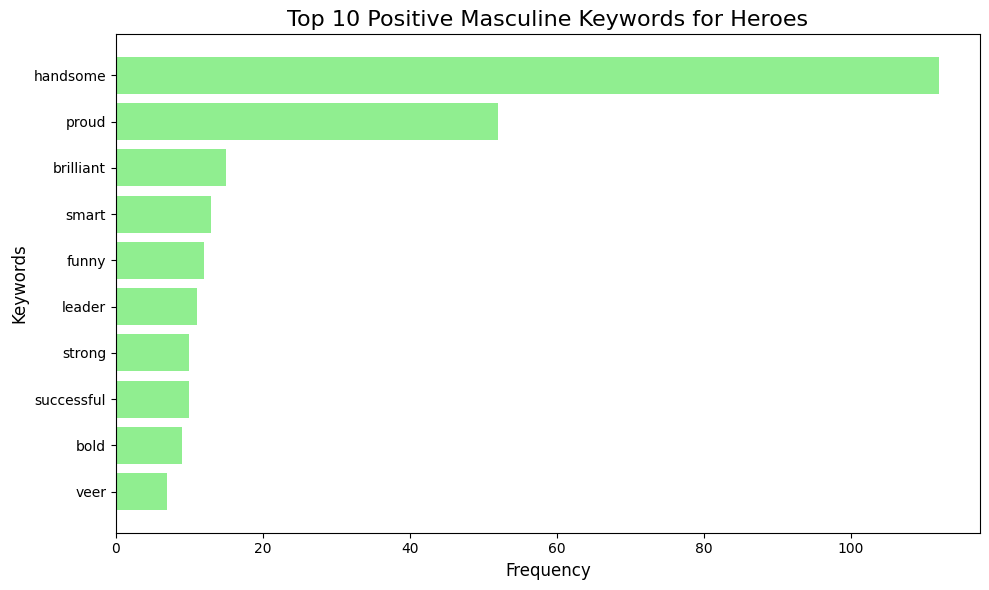

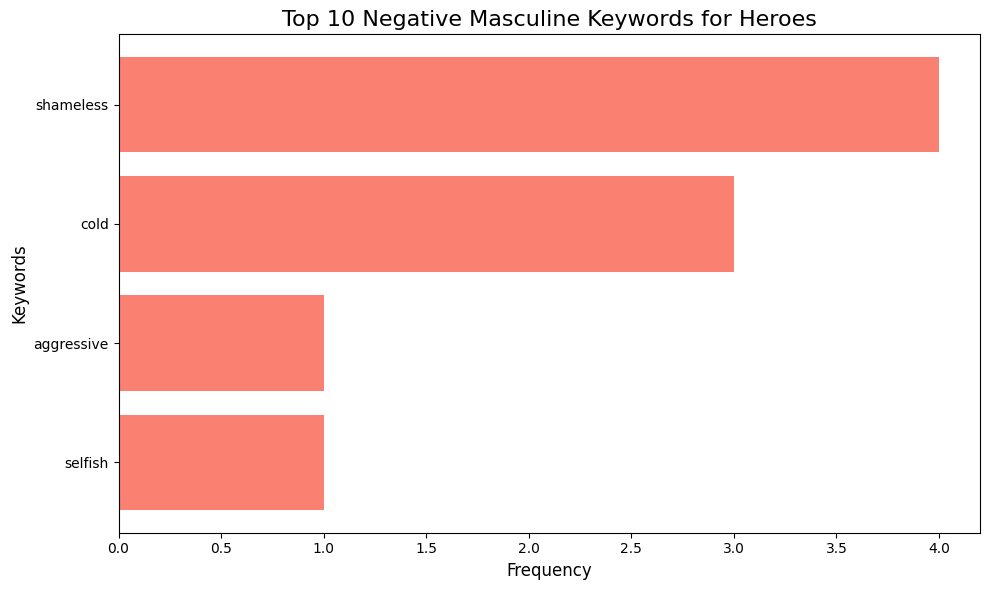

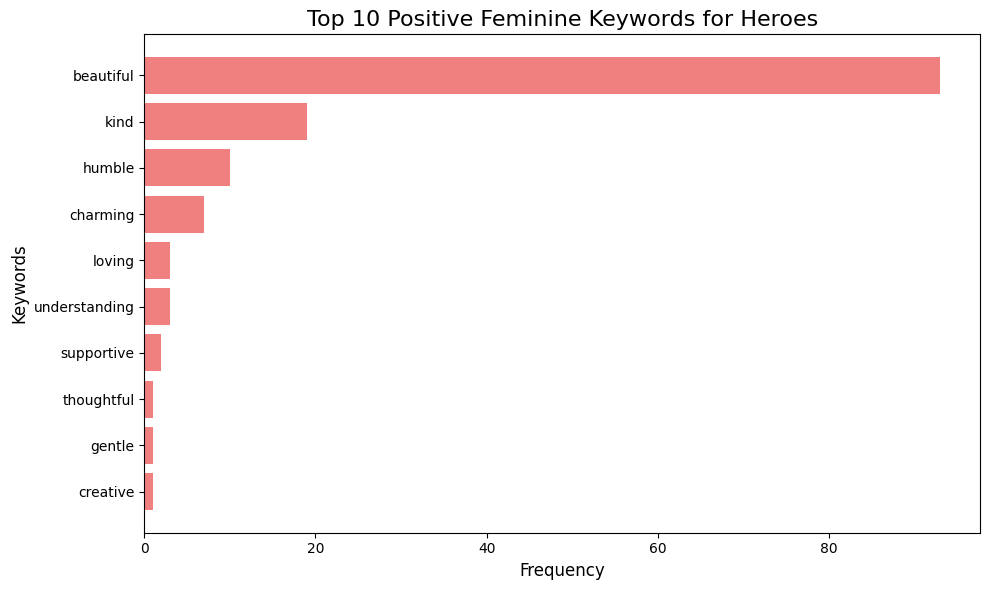

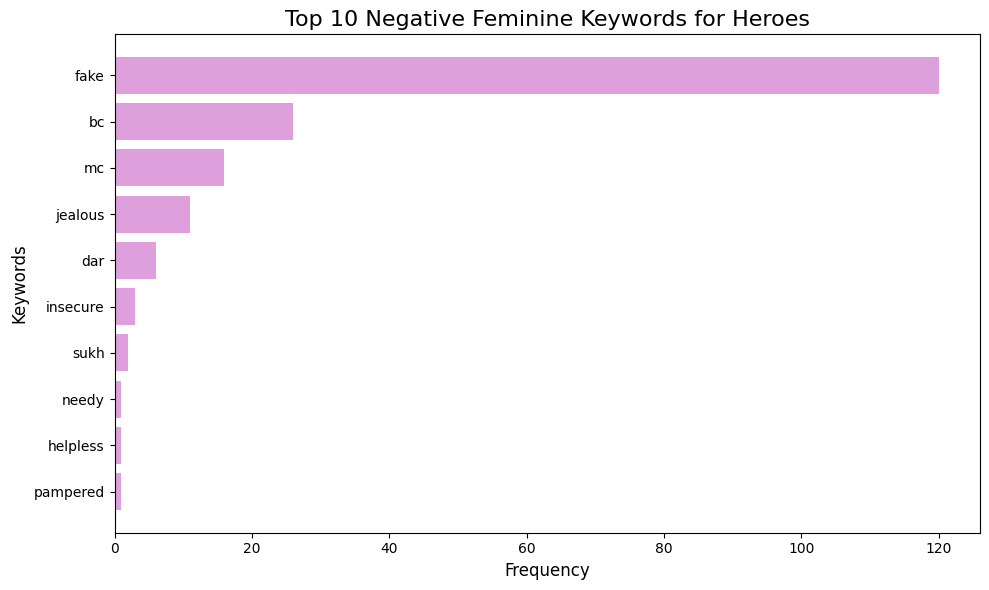

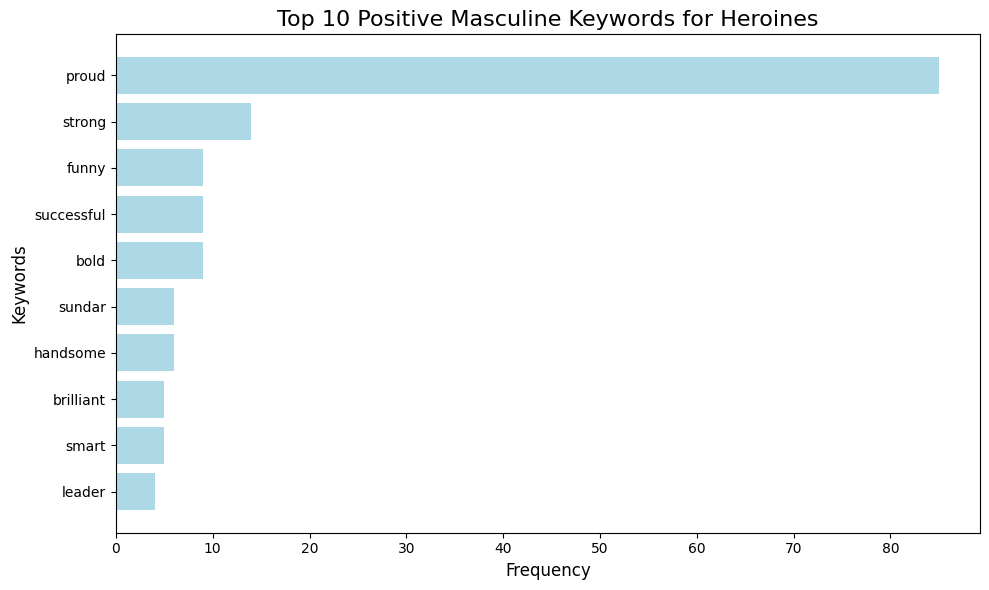

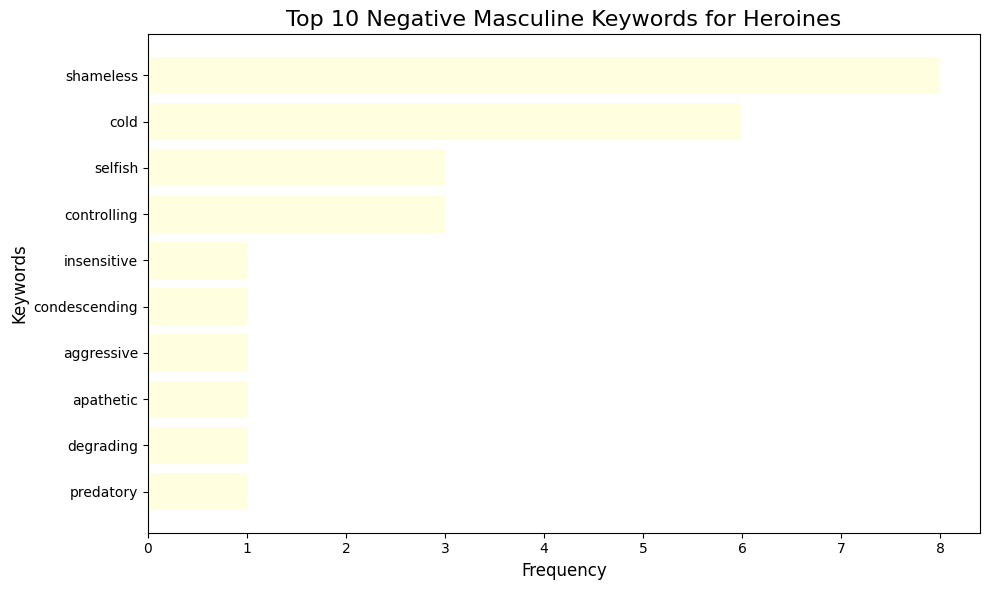

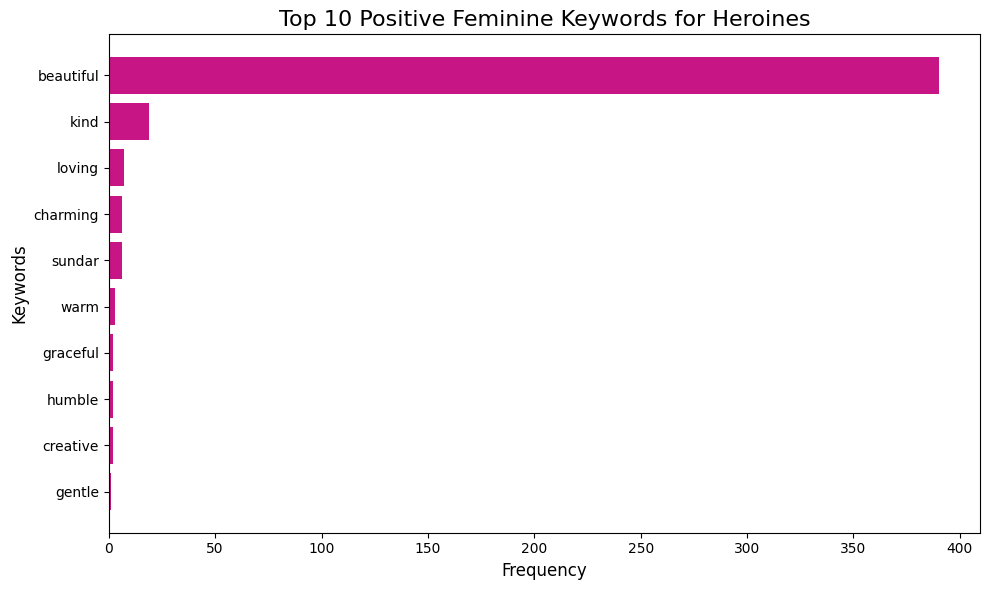

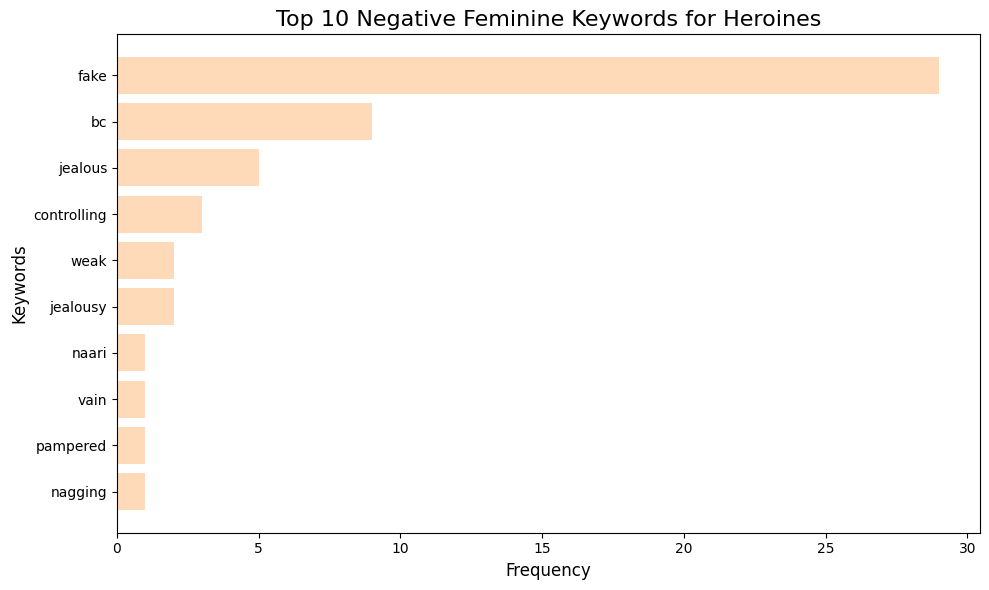

In [ ]:
import matplotlib.pyplot as plt
import nltk
from collections import Counter

# Download punkt for tokenization
nltk.download('punkt')

# Function to extract top N keywords from a list of words
def extract_top_keywords(df, stereotype_list, n=10):
    # Flatten the text into a list of words from the 'TweetText' column
    all_words = [word for text in df['TweetText'] for word in nltk.word_tokenize(text.lower()) if word in stereotype_list]

    # Count the frequency of each word
    word_freq = Counter(all_words)

    # Get the top N most common words
    top_keywords = word_freq.most_common(n)

    return top_keywords

# Function to plot top keywords as bar charts
def plot_keywords(keywords, title, color='skyblue'):
    words, counts = zip(*keywords)

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Keywords', fontsize=12)
    plt.gca().invert_yaxis()  # To have the most frequent word on top
    plt.tight_layout()
    plt.show()

# Top 10 keywords for positive masculine stereotypes in heroes
heroes_positive_masculine_keywords = extract_top_keywords(heroes_df, positive_masculine_stereotypes)
plot_keywords(heroes_positive_masculine_keywords, "Top 10 Positive Masculine Keywords for Heroes", color='lightgreen')

# Top 10 keywords for negative masculine stereotypes in heroes
heroes_negative_masculine_keywords = extract_top_keywords(heroes_df, negative_masculine_stereotypes)
plot_keywords(heroes_negative_masculine_keywords, "Top 10 Negative Masculine Keywords for Heroes", color='salmon')

# Top 10 keywords for positive feminine stereotypes in heroes
heroes_positive_feminine_keywords = extract_top_keywords(heroes_df, positive_feminine_stereotypes)
plot_keywords(heroes_positive_feminine_keywords, "Top 10 Positive Feminine Keywords for Heroes", color='lightcoral')

# Top 10 keywords for negative feminine stereotypes in heroes
heroes_negative_feminine_keywords = extract_top_keywords(heroes_df, negative_feminine_stereotypes)
plot_keywords(heroes_negative_feminine_keywords, "Top 10 Negative Feminine Keywords for Heroes", color='plum')

# Top 10 keywords for positive masculine stereotypes in heroines
heroines_positive_masculine_keywords = extract_top_keywords(heroines_df, positive_masculine_stereotypes)
plot_keywords(heroines_positive_masculine_keywords, "Top 10 Positive Masculine Keywords for Heroines", color='lightblue')

# Top 10 keywords for negative masculine stereotypes in heroines
heroines_negative_masculine_keywords = extract_top_keywords(heroines_df, negative_masculine_stereotypes)
plot_keywords(heroines_negative_masculine_keywords, "Top 10 Negative Masculine Keywords for Heroines", color='lightyellow')

# Top 10 keywords for positive feminine stereotypes in heroines
heroines_positive_feminine_keywords = extract_top_keywords(heroines_df, positive_feminine_stereotypes)
plot_keywords(heroines_positive_feminine_keywords, "Top 10 Positive Feminine Keywords for Heroines", color='mediumvioletred')

# Top 10 keywords for negative feminine stereotypes in heroines
heroines_negative_feminine_keywords = extract_top_keywords(heroines_df, negative_feminine_stereotypes)
plot_keywords(heroines_negative_feminine_keywords, "Top 10 Negative Feminine Keywords for Heroines", color='peachpuff')
